In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
# xtrain = train.drop('')
train.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [3]:
xtrain = train.drop('label', axis=1).values.astype('float32')/255.0
xtest = test.drop('label', axis=1).values.astype('float32')/255.0
ytrain = train['label'].values
ytest = test['label'].values

In [4]:
# Reshape
xtrain = xtrain.reshape((-1,28,28,1))
xtest = xtest.reshape((-1,28,28,1))

In [5]:
# Layers
from keras.utils import to_categorical
ytrain = to_categorical(ytrain,10)
ytest = to_categorical(ytest, 10)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense,Dropout, Flatten, MaxPooling2D
m = Sequential()

In [7]:
m.add(Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=((28,28,1))))
m.add(MaxPooling2D(2,2))
m.add(Flatten())
m.add(Dense(units=128, activation='relu'))
m.add(Dense(units= 10, activation='softmax'))
m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m.fit(xtrain, ytrain, epochs=8, validation_data=(xtest, ytest))

C:\Users\buoyn\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8091 - loss: 0.5330 - val_accuracy: 0.8977 - val_loss: 0.2880
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8988 - loss: 0.2782 - val_accuracy: 0.9089 - val_loss: 0.2501
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9186 - loss: 0.2261 - val_accuracy: 0.9180 - val_loss: 0.2288
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9317 - loss: 0.1866 - val_accuracy: 0.9109 - val_loss: 0.2565
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9393 - loss: 0.1610 - val_accuracy: 0.9233 - val_loss: 0.2246
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9503 - loss: 0.1360 - val_accuracy: 0.9235 - val_loss: 0.2280
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9598 - loss: 0.1123 - val_accuracy: 0.9223 - val_loss: 0.2460
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9626 - loss: 0.0976 -

In [11]:
loss, accuracy = m.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9173 - loss: 0.2688


In [14]:
ypred = m.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
ypredLabel = np.argmax(ypred,axis=1)
xlabels = np.argmax(ytest,axis=1)

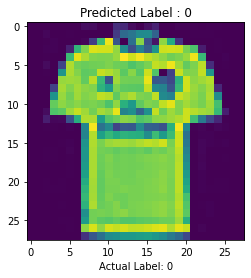

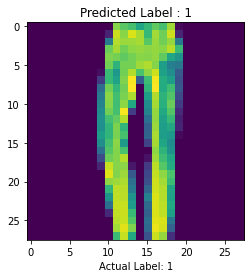

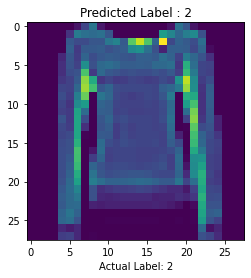

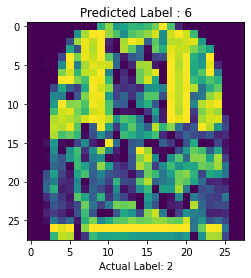

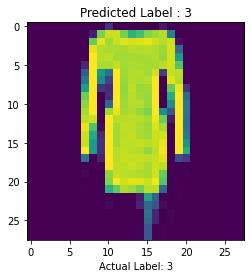

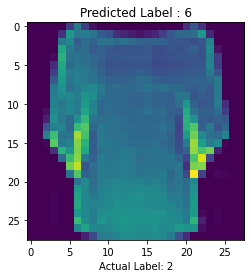

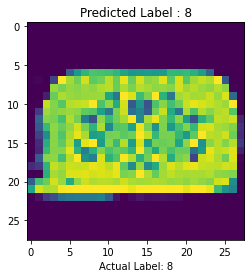

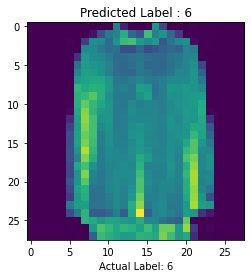

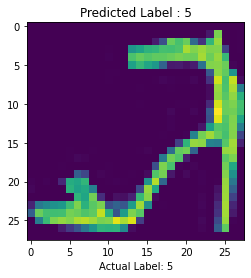

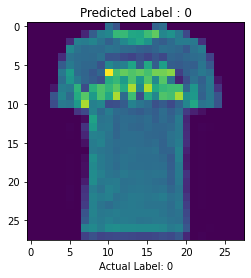

In [20]:
import matplotlib.pyplot as plt
for i in range (10):
    plt.imshow(xtest[i])
    plt.title(f'Predicted Label : {ypredLabel[i]}')
    plt.xlabel(f'Actual Label: {xlabels[i]}')
    plt.show()